It's a simple project to convert celsius to farenhite
  We have training data and test data

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/My Drive/Tensorflow_datasets_ryan/Celsius+to+Fahrenheit.csv')
df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [4]:
df.tail(5)

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [5]:
df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


### visualize

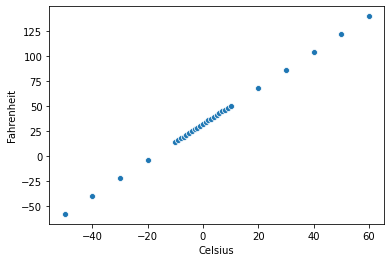

In [9]:
sns.scatterplot(df['Celsius'],df['Fahrenheit'])

Look at the linearity, will explain in a bit

### Train test split
  we will use all data for training as these numberd are less..
  

In [10]:
x_train=df['Celsius']
y_train = df['Fahrenheit']

In [13]:
print(x_train.shape)
print(y_train.shape)

(30,)
(30,)


In [14]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')
epochs_hist=model.fit(x_train,y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 687.1718
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 686.8770
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 677.1047
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 672.6075
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 669.2265
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 663.4172
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 656.7956
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 651.1213
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 646.6676
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 642.3566
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 637.2877
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 631.6419
Epoch 13/500
1/1 [===================

In [40]:
epochs_hist.history.keys()

dict_keys(['loss'])

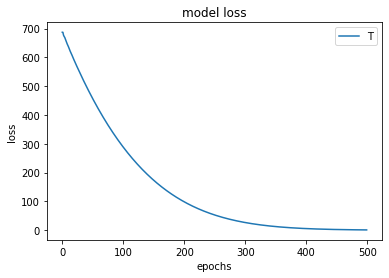

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend('Training loss')

In [42]:
model.get_weights()

[array([[1.8036844]], dtype=float32), array([31.069149], dtype=float32)]

These are the coefficient of our equation

In [44]:
temp_c = 20
temp_f = model.predict([temp_c])
print('the conversion of the celsius to farhehite is ',temp_f)

the conversion of the celsius to farhehite is  [[67.14284]]


In actual 20 degree celsius is 68 degree farhenhite, so the ANN did a great job